# Movies Dataset Analysis

In this Project i am going to Explore Movies Dataset which i got from kaggle datasets (https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney).

I am going to use python EDA tools such as (pandas, matplotlib, seaborn etc) and techniques which i learned from various resources such as youtube, google and mainly from the [the course](http://zerotopandas.com).
In this Project i am gonna implement all the techniques whic i have learned in this course.

In [1]:
project_name = "movies-dataset-analysis" 

## Data Preparation and Cleaning

#### Importing necessary Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [6]:
df = pd.read_csv('movies_platforms.csv')

In [7]:
df.shape

(16744, 17)

In [8]:
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


#### There are 16744 rows(Movies) and 14 columns(Features) in the dataset. 

#### We can delete 'Unnamed: 0' since we already have 'ID' column

In [9]:
del df['Unnamed: 0']

## Exploratory Analysis and Visualization

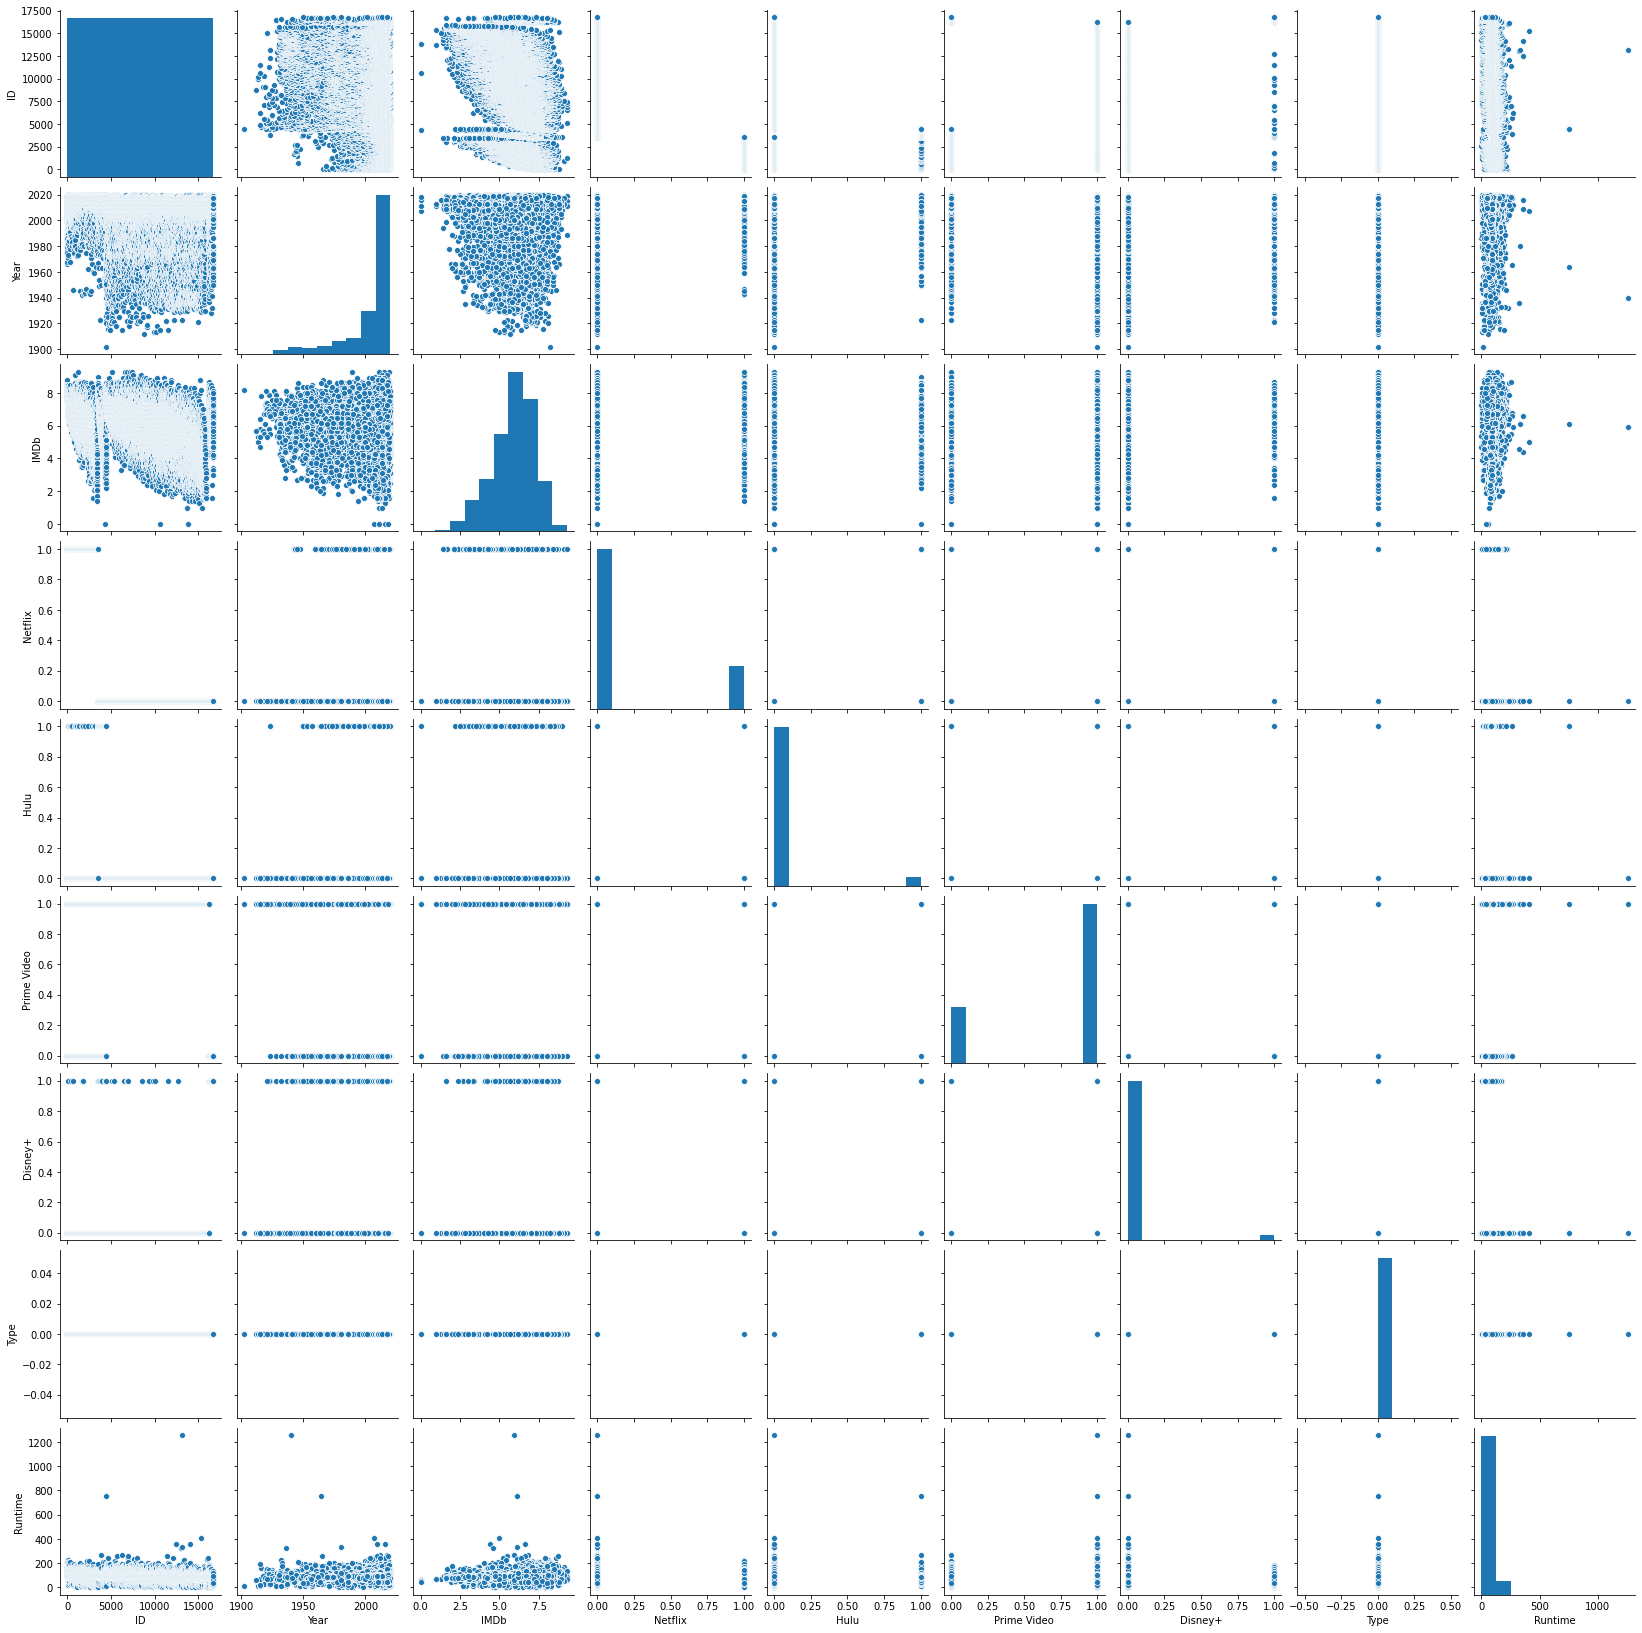

In [12]:
sns.pairplot(df)

 ### Applying describe method on dataframe, to get some statistical information about the data.
 
 Pandas describe() is used to view some basic statistical details.
 ref https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

In [13]:
df.describe()

,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


# Observations
    1) Dataset contains information of movies form year 1902 to 2020.
    2) Average IMDb rating of movies is 5.9.
    3) Average Runtime of Movies is about 93 mins.
    4) Data in Runtime column is skewed since, its Max value is 1256 which is kind of odd from other percentiles.

### Plotting Heatmap to check if data contains null values

<AxesSubplot:>

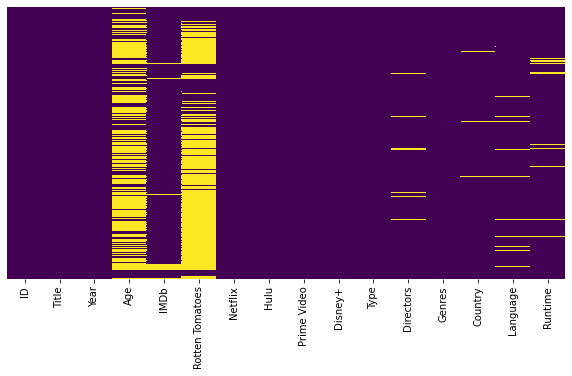

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

# Observations

    1) Rotten Tomatoes Rating Column has almost 70% of data missing.
    2) Age restriction Column has 50-60% of data missing.
    3) Directors, Country, Language and Runtime Columns too have small amount of missing values.

#### Plotting Data in Runtime Column, to check if it is skewed or has outliers.

1) Histogram plot

<AxesSubplot:xlabel='Runtime'>

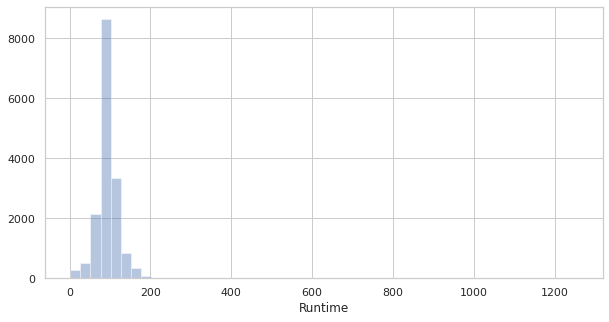

In [15]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.distplot(df['Runtime'], kde=False)

2) Scatter Plot

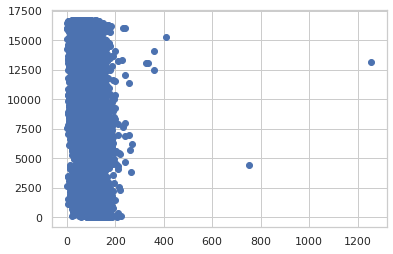

In [16]:
plt.scatter(x='Runtime', y='ID', data=df)

## Observation
    
    Data is skewed positively, and also have some ouliers. so our observation in describe() method was right.

#### The 'Type' column is looking somewhat unuseful, plotting its countplot to check if we can drop it.

<AxesSubplot:xlabel='Type', ylabel='count'>

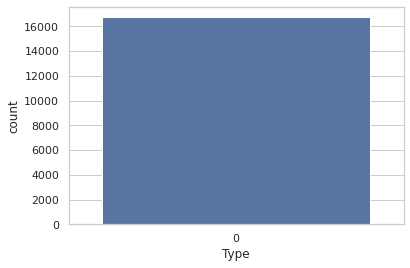

In [17]:
sns.countplot('Type', data=df)

### Observation
    It can be seen that, it has only one value i.e 0 hence there is no point of keeping it. we can drop it 

### Dropping insignificant Columns.

In [18]:
del df['Type']
del df['Rotten Tomatoes']

## Asking and Answering Questions

## 1. Platform has maximum number of movies

In [21]:
netfilx_count = df['Netflix'].value_counts()[1]
hulu_count = df['Hulu'].value_counts()[1]
prime_vid_count = df['Prime Video'].value_counts()[1]
disney_count = df['Disney+'].value_counts()[1]


movies_count = pd.DataFrame({'Platform' : ['Netflix', 'Hulu', 'Prime Video', 'Disney+'], 'Count':[netfilx_count, hulu_count,prime_vid_count,disney_count]}).sort_values(by='Count', ascending=False)

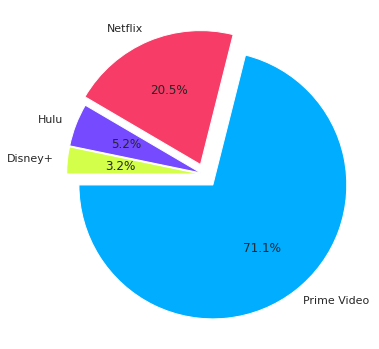

In [22]:
plt.figure(figsize=(6,7))
plt.pie(movies_count['Count'], labels=movies_count['Platform'], explode=[0.1,0.08,0.03,0.03], colors=['#00adff', '#f83c68', '#764aff', '#d3ff4a'], autopct='%1.1f%%', startangle=180)

plt.show()

## Observations
        from the above pie chart it is clear that, Amazon Prime Video has maximum Movies followed by Netflix. 

## 2. Highest Rated Movies

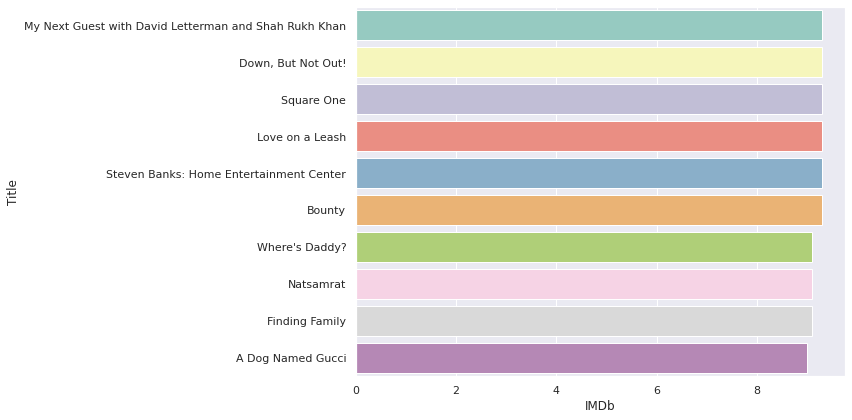

In [23]:
top_rated = df.sort_values(by='IMDb', ascending=False)[['Title', 'Year', 'Directors', 'IMDb']].head(10)

plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.barplot(x='IMDb', y='Title', data=top_rated, palette="Set3")
plt.tight_layout()
plt.show()

## 3. Most popular genres across streaming platform

In [24]:
count = Counter()

for row in df['Genres']:
    try:
      row_list = row.split(',')
      count.update(Counter(row_list))

    # Ignoring Nan values
    except: 
      pass
      
count= dict(count)

genre_count = pd.DataFrame({'Genres':list(count.keys()), 'Counts':list(count.values())}).sort_values(by='Counts', ascending=False)

To calculate genre counts we can't use pandas value_counts() function directly since, one movie can have more than one genre.

to calculate unique genre count we can use Counter() object from collections module.
In above code we created count as Counter() object and for every row in 'Genres' column we update count for every unique genre.
basically Counter() object creates dictionary with key(genre) and value(count) and
update function updates the count for key if present in dictionary else add the key to the dictionary.

for more detail ref. https://docs.python.org/3.1/library/collections.html

#### Now, after collecting counts, we can visualize data.

<AxesSubplot:xlabel='Counts', ylabel='Genres'>

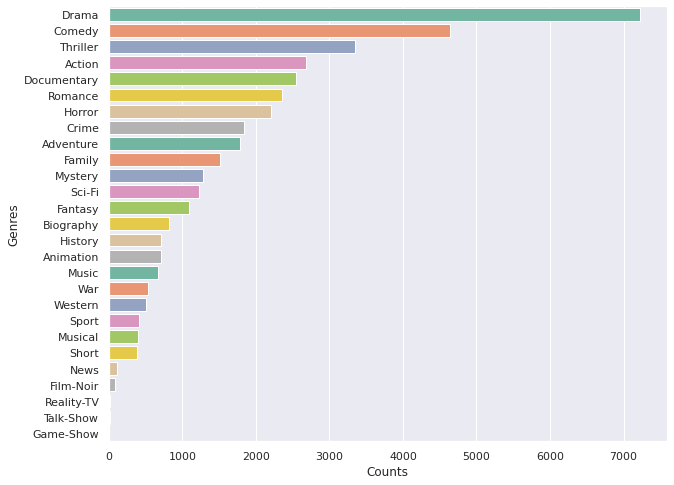

In [25]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.barplot(x='Counts', y='Genres', data=genre_count, palette="Set2")

## Observation
'Drama' is the most popular genre followed by 'Comedy'.

# 4. Movies released per year 

<AxesSubplot:title={'center':'Movies Per Year'}, xlabel='Year'>

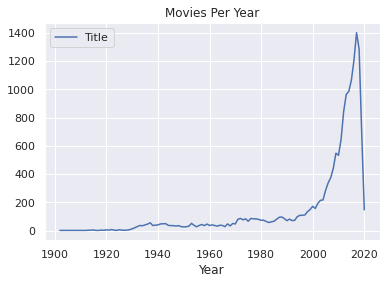

In [26]:
movies_per_year = pd.DataFrame(df.groupby('Year').Title.count())

movies_per_year.plot(title='Movies Per Year')

## Observations:
      1) from year 1900 to 1930 movies count per year was somewhat constant i.e ( < 20).
      2) first increase in movies count was in around 1930 i.e 20.
      3) biggest rise in the movies count started from around 2000 and the maximum count was in year 2017.
      4) movies count in year 2017 was 1401 which was the maximum.

# 5. Movies with longest Runtime.

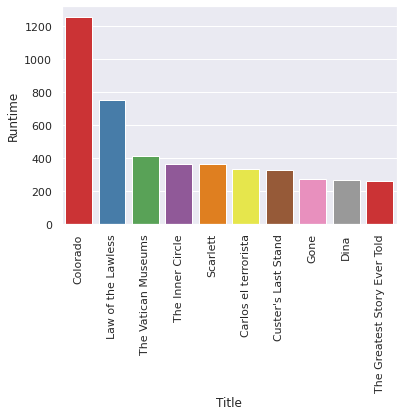

In [27]:
longest_runtime_movies = df.sort_values('Runtime',ascending = False).head(10)

sns.barplot(x='Title', y='Runtime', data=longest_runtime_movies, palette="Set1")
plt.xticks(rotation=90)
plt.show()

# Some Analysis on Indian shows

In [28]:
indian_shows = df[df.Country == 'India']

In [29]:
indian_shows

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
11,12,3 Idiots,2009,13+,8.4,1,0,1,0,Rajkumar Hirani,"Comedy,Drama",India,"Hindi,English",170.0
34,35,Dangal,2016,7+,8.4,1,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport",India,Hindi,161.0
38,39,Like Stars on Earth,2007,7+,8.4,1,0,0,0,"Aamir Khan,Amole Gupte","Drama,Family",India,"Hindi,English",165.0
81,82,Lagaan: Once Upon a Time in India,2001,7+,8.1,1,0,0,0,Ashutosh Gowariker,"Adventure,Drama,Musical,Sport",India,"Hindi,English,Awadhi,Urdu",224.0
88,89,Bahubali: The Beginning,2015,13+,8.1,1,0,0,0,S.S. Rajamouli,"Action,Drama",India,"Telugu,Tamil",159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15820,15821,Escape From Taliban,2003,NaN,4.5,0,0,1,0,Ujjwal Chatterjee,"Adventure,Drama,Thriller,War",India,"Hindi,English,Urdu",166.0
15822,15823,Machine,2007,18+,2.7,0,0,1,0,"Abbas Alibhai Burmawalla,Mastan Alibhai Burmaw...","Action,Mystery,Romance,Thriller",India,Hindi,148.0
15854,15855,KAALA (Malayalam),2018,NaN,NaN,0,0,1,0,Anuraj,"Short,Mystery",India,Malayalam,20.0
16064,16065,Prathighatana,2014,NaN,NaN,0,0,1,0,Tammareddy Bharadwaja,Drama,India,Telugu,117.0


# 6. Most liked Indian Shows. (based on IMDb rating)

In [30]:
top_10_indian = indian_shows.sort_values(by='IMDb', ascending=False).head(10)
top_10_indian

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
947,948,Natsamrat,2016,NaN,9.1,1,0,0,0,Mahesh Manjrekar,"Drama,Family",India,Marathi,166.0
8271,8272,Arise,2013,NaN,8.9,0,0,1,0,Priyadarshan,"Comedy,Drama",India,Tamil,130.0
5153,5154,Anand,1971,18+,8.7,0,0,1,0,Hrishikesh Mukherjee,"Drama,Musical",India,Hindi,122.0
1979,1980,One Heart: The A.R. Rahman Concert Film,2017,NaN,8.7,1,0,0,0,"Deepak Gattani,Ym Movies","Documentary,Music",India,NaN,87.0
5931,5932,Nayakan,1987,NaN,8.7,0,0,1,0,Mani Ratnam,"Crime,Drama",India,Tamil,145.0
1311,1312,Eh Janam Tumhare Lekhe,2015,NaN,8.7,1,0,0,0,Harjit Singh,Biography,India,Punjabi,135.0
5607,5608,Aruvi,2017,NaN,8.6,0,0,1,0,Arun Prabhu Purushothaman,Drama,India,Tamil,130.0
1356,1357,Merku Thodarchi Malai,2018,NaN,8.6,1,0,0,0,Leninbharati,Drama,India,"Tamil,Malayalam",122.0
6461,6462,Zakir Khan : Haq Se Single,2017,NaN,8.6,0,0,1,0,Angshuman Ghosh,Comedy,India,Hindi,90.0
9375,9376,Run Baby Run,1998,NaN,8.6,0,0,1,0,Joshiy,"Action,Comedy,Thriller",India,"Malayalam,Telugu",180.0


## Observation

<b>Natsamrat</b> is the most liked indian marathi movie with IMDb rating of <b>9.1</b>.

# 7. Most Disliked Indian Shows.

In [31]:
worst_10_indian = indian_shows.sort_values(by='IMDb').head(20)
worst_10_indian

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
3453,3454,Himmatwala,2013,NaN,1.7,1,0,0,0,Sajid Khan,"Action,Comedy",India,Hindi,150.0
10491,10492,Race 3,2018,NaN,2.0,0,0,1,0,Remo D'Souza,"Action,Thriller",India,Hindi,160.0
15612,15613,Drona,2008,NaN,2.0,0,0,1,0,Goldie Behl,"Action,Adventure,Fantasy",India,Hindi,138.0
14617,14618,Parwana,2003,NaN,2.1,0,0,1,0,Jyoti Swaroop,"Romance,Thriller",India,Hindi,93.0
3458,3459,Karzzzz,2008,NaN,2.1,1,0,0,0,Satish Kaushik,"Action,Drama,Musical,Romance,Thriller",India,Hindi,142.0
3036,3037,B. A. Pass 2,2017,NaN,2.1,1,0,0,0,Shadab Khan,Drama,India,Hindi,125.0
3312,3313,Mythily Veendum Varunnu...,2017,NaN,2.3,1,0,0,0,Sabu Varghese,Horror,India,Malayalam,94.0
13997,13998,Trip to Bhangarh,2014,13+,2.4,0,0,1,0,Jitendra Pawar,"Horror,Thriller",India,Hindi,113.0
3229,3230,Deewana Main Deewana,2013,NaN,2.5,1,0,1,0,K.C. Bokadia,"Comedy,Drama,Romance,Thriller",India,Hindi,130.0
3205,3206,Tees Maar Khan,2010,NaN,2.5,1,0,0,0,Farah Khan,"Comedy,Crime",India,Hindi,135.0


# 8. Longest Indian Movies.

In [32]:
longest_indian_movies = indian_shows.sort_values(by='Runtime', ascending=False).head(5)
longest_indian_movies

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
81,82,Lagaan: Once Upon a Time in India,2001,7+,8.1,1,0,0,0,Ashutosh Gowariker,"Adventure,Drama,Musical,Sport",India,"Hindi,English,Awadhi,Urdu",224.0
2289,2290,Jatt James Bond,2014,7+,6.7,1,0,0,0,Rohit Jugraj,Comedy,India,Punjabi,220.0
5498,5499,Mohabbatein,2000,7+,7.1,0,0,1,0,Aditya Chopra,"Musical,Drama,Romance",India,Hindi,216.0
374,375,Jodhaa Akbar,2008,13+,7.6,1,0,0,0,Ashutosh Gowariker,"Action,Drama,History,Romance,War",India,"Hindi,Urdu",213.0
151,152,Swades,2004,all,8.2,1,0,0,0,Ashutosh Gowariker,Drama,India,"Hindi,English",210.0


# 9. Top Indian Directors

In [33]:
indian_shows[indian_shows.IMDb > 8].Directors.value_counts().head(10)

Hrishikesh Mukherjee    3
Rajkumar Santoshi       2
Mani Ratnam             2
S.S. Rajamouli          2
Ashutosh Gowariker      2
Rajkumar Hirani         2
J. Mahendran            1
Priyadarshan            1
Aditya Chopra           1
Harjit Singh            1
Name: Directors, dtype: int64

# 10. Age count of Indian Movies.

In [34]:
indian_shows.Age.value_counts().head(10)

7+     128
13+     91
all     87
18+     48
16+      4
Name: Age, dtype: int64

# 10. Popular Genre in United States

In [35]:
df[df.Country == 'United States'].Genres.value_counts().head(10)

Documentary             739
Comedy                  670
Drama                   615
Horror                  274
Comedy,Drama            224
Horror,Thriller         190
Comedy,Drama,Romance    168
Drama,Romance           158
Comedy,Romance          155
Documentary,Comedy      127
Name: Genres, dtype: int64

# 11. Language used in most of the movies.

In [36]:
from collections import Counter

count = Counter()

for row in df['Language']:
    try:
      row_list = row.split(',')
      count.update(Counter(row_list))

    # Ignoring Nan values
    except: 
      pass
      
count= dict(count)

language_count = pd.DataFrame({'Language':list(count.keys()), 'Counts':list(count.values())}).sort_values(by='Counts', ascending=False)

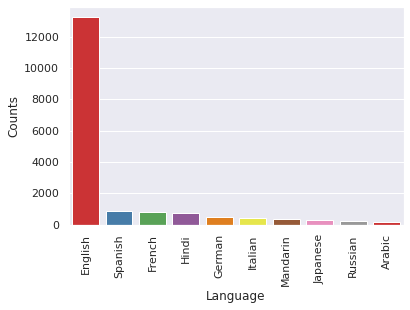

In [37]:
sns.barplot(x='Language', y='Counts', data=language_count.head(10), palette="Set1")
plt.xticks(rotation=90)
plt.show()

Ofcourse its English. But the second one is Spanish. and Hindi on fourth

# 12. Directors with maximum number of Hit Movies (IMDb > 8)

In [38]:
df[df.IMDb > 8].Directors.value_counts().head(10)

Rocco Urbisci                 10
Christopher Nolan              3
Steven J. Santos               3
Martin Scorsese                3
Quentin Tarantino              3
Hrishikesh Mukherjee           3
Robert Hughes,Sue Perrotto     2
Rajkumar Hirani                2
Rajkumar Santoshi              2
Philip Gardiner                2
Name: Directors, dtype: int64

## Observation

<b>Rocco Urbisci</b> has Directed maximum number of hit movies (IMDb rating > 8) with count of 10/11. <br>
<b>Hrishikesh Mukherjee</b> indian Film Director is at 2nd position for hit movies count with count of 3/7.

# 13. Movies count by Country

In [39]:
count = Counter()

for row in df['Country']:
    try:
      row_list = row.split(',')
      count.update(Counter(row_list))

    # Ignoring Nan values
    except: 
      pass
      
count= dict(count)

country_count = pd.DataFrame({'Country':list(count.keys()), 'Counts':list(count.values())}).sort_values(by='Counts', ascending=False)

In [40]:
country_count.head(10)

,Country,Counts
0,United States,10486
1,United Kingdom,1713
8,India,1157
11,Canada,1117
5,France,741
7,Germany,498
2,Italy,417
3,Spain,329
12,Australia,321
16,Hong Kong,269


# 14. Movies count by Age

In [41]:
df.Age.value_counts()

18+    3474
7+     1462
13+    1255
all     843
16+     320
Name: Age, dtype: int64

## Inferences and Conclusion

1) From the pair plot it can be seen that no two variables(features) are linearly related to each other, and most of them are      skewed<br><br>
2) The reason for prime video having more movies can be simply becuase of the relationship of people with Amazon.com. (Price can      also be a Factor)<br><br>
3) Majority Of the Viewers prefer 'Drama' (genre). But in United States most popular genre is 'Documentary'.
4) Increase in movies production can be due to increase in technology, which increases followings, ease of shooting etc. (There    can also be another reasons)<br><br>
5) Most of the people prefer movies with runtime of around 90 mins.<br><br>
6) In India most of the Most Liked Shows are Tamil i.e Tollywood. <br><br>
7) United States is largest film producing Country followed by United Kingdom. (India is at the Third position.)<br><br>
8) Most of The movies (world wide) are 18+, but in india  most of them are 7+ i.e (Family Shows)<br><br>
9) According to data most successful Director is <b>Rocco Urbisci</b>. (ref. ) also indian director <b>Hrishikesh Mukherjee</b> have good count of hit movies.

## References and Future Work

References
    
 https://stackoverflow.com/<br>
 https://kaggle.com/<br>
 https://youtube.com/<br>
  https://www.youtube.com/channel/UCmKaoNn0OvxVAe7f_8sXYNQ<br>
  https://www.youtube.com/user/krishnaik06<br>
 https://medium.com/<br>
    etc...

### Future Work

This analysis can be used for.

1) Applying Machine Learning algorithms for predicting movies Rating.<br>
2) Making movies recomendation engines.